In [257]:
#Data exploration of the csv file, remember to change the file path.
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('..\\data\\raw\\creditcard.csv')


In [258]:
import random
fraudulent_samples = pd.read_csv('..\\data\\raw\\generated_15000_samples.csv')


# Normalization function.

"""
Takes the dataframe, generates a random value for i depending
on another random value for i and then adds it to the counter to
make the data seem somewhat more organic

it lowkey fucking sucks but it kinda works tbh
"""
def normalize_hour_values(dataframe):
    i = 0
    for index, row in dataframe.iterrows():
        dataframe.loc[index, 'cd "Time"'] = i
        if random.randint(0, 100) >= 65:
            i += 6
        else:
            i += random.randint(9, 20)


    return dataframe

fraudulent_samples = normalize_hour_values(fraudulent_samples)

In [259]:
fraudulent_samples

,"cd ""Time""",V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-8.575101,7.163163,-11.333138,5.875824,-8.385775,-1.133045,-12.375636,2.114336,-4.715884,...,-0.489117,0.632000,0.516847,0.073557,-0.092149,-0.539546,2.379289,-0.526433,-72.270268,1
1,13.0,-7.316885,4.006644,-9.882355,5.870318,-4.653798,-4.169812,-11.078993,4.476778,-4.279535,...,-1.951315,0.252622,-1.791251,0.348954,0.309584,-0.792209,-0.253797,0.890581,-20.677315,1
2,33.0,-10.581232,6.242814,-12.133547,6.218074,-5.898546,-1.768846,-13.672765,0.000006,-3.655150,...,-0.387954,-0.548953,0.152803,-0.222540,-0.245681,-0.632994,0.495670,0.225117,101.752342,1
3,42.0,-3.338607,2.217557,-7.526513,6.209208,-2.813416,0.209234,-3.628555,-1.182679,-1.192553,...,-2.686209,-0.194160,0.433918,-0.195188,0.972591,0.107902,0.118080,0.244904,518.370901,1
4,48.0,-13.339540,8.898089,-15.360692,6.517614,-9.640975,-1.210471,-13.310043,2.706954,-2.936397,...,-5.809643,0.809752,-0.872176,-0.192182,-0.584121,-1.090479,-2.293970,-0.276434,190.843091,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,172107.0,11.985406,-4.491528,11.309425,1.447103,10.036259,2.325991,11.785820,-8.135735,0.905686,...,-1.879864,0.907800,-0.136517,-0.465558,-0.431895,-0.047143,-0.607700,0.051906,416.108561,1
14996,172113.0,-10.361126,4.481350,-10.253822,5.540521,-8.960738,-2.361618,-8.641865,9.706040,-3.205500,...,4.464613,-1.388542,0.239338,0.496081,0.320713,0.506454,3.496585,0.340434,160.968229,1
14997,172128.0,-4.524699,4.784390,-8.683199,5.791957,-4.025868,-2.173776,-11.908591,-0.195581,-3.418251,...,1.834168,0.309341,-1.415421,-0.207559,-1.135637,-0.135835,1.533603,0.015526,22.229595,1
14998,172134.0,0.518489,1.090801,-3.435934,2.178735,3.300198,-3.593271,-2.308594,-0.591706,-1.660695,...,-1.649889,0.920136,-1.271195,-0.633450,0.335430,-0.005998,1.646959,0.217343,-6.175074,1


In [260]:
dataframes_list = [data, fraudulent_samples]
data = pd.concat(dataframes_list, ignore_index=True)
data.sort_values(by='cd "Time"')

,"cd ""Time""",V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
284807,0.0,-8.575101,7.163163,-11.333138,5.875824,-8.385775,-1.133045,-12.375636,2.114336,-4.715884,...,-0.489117,0.632000,0.516847,0.073557,-0.092149,-0.539546,2.379289,-0.526433,-72.270268,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.770000,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.790000,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.000000,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.880000,0


In [261]:
#Revising the structure of the data
data.head()

,"cd ""Time""",V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [262]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299807 entries, 0 to 299806
Data columns (total 31 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   cd "Time"  299807 non-null  float64
 1   V1         299807 non-null  float64
 2   V2         299807 non-null  float64
 3   V3         299807 non-null  float64
 4   V4         299807 non-null  float64
 5   V5         299807 non-null  float64
 6   V6         299807 non-null  float64
 7   V7         299807 non-null  float64
 8   V8         299807 non-null  float64
 9   V9         299807 non-null  float64
 10  V10        299807 non-null  float64
 11  V11        299807 non-null  float64
 12  V12        299807 non-null  float64
 13  V13        299807 non-null  float64
 14  V14        299807 non-null  float64
 15  V15        299807 non-null  float64
 16  V16        299807 non-null  float64
 17  V17        299807 non-null  float64
 18  V18        299807 non-null  float64
 19  V19        299807 non-n

In [263]:
data.describe()

,"cd ""Time""",V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,299807.000000,299807.000000,299807.000000,299807.000000,299807.000000,299807.000000,299807.000000,299807.000000,299807.000000,299807.000000,...,299807.000000,299807.000000,299807.000000,299807.000000,299807.000000,299807.000000,299807.000000,299807.000000,299807.000000,299807.000000
mean,94383.295100,-0.240106,0.181817,-0.351955,0.225913,-0.159896,-0.069234,-0.278844,0.028316,-0.128103,...,0.036294,0.000264,-0.001868,-0.005154,0.002188,0.002517,0.008608,0.003963,90.124498,0.051673
std,47641.426177,2.656143,2.037903,2.664912,1.814125,1.936525,1.396524,2.358949,1.922511,1.331504,...,1.131790,0.782033,0.704234,0.601984,0.539051,0.481678,0.500267,0.344605,250.562445,0.221367
min,0.000000,-56.407510,-72.715728,-48.325589,-7.519622,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-919.413727,0.000000
25%,53783.500000,-1.017145,-0.583212,-1.056839,-0.809410,-0.763937,-0.807915,-0.620543,-0.220091,-0.729557,...,-0.234709,-0.553661,-0.170727,-0.359947,-0.322141,-0.325210,-0.073863,-0.055139,5.380000,0.000000
50%,84770.000000,-0.065234,0.099654,0.123853,0.057342,-0.080646,-0.297388,0.014542,0.023643,-0.087263,...,-0.026490,0.006828,-0.011497,0.036670,0.017345,-0.046142,0.002029,0.011641,23.000000,0.000000
75%,138989.500000,1.306699,0.882985,1.003681,0.907303,0.610087,0.381506,0.563776,0.353511,0.573674,...,0.201424,0.542570,0.156407,0.431572,0.357633,0.248971,0.101252,0.084164,84.160400,0.000000
max,172792.000000,19.526367,22.057729,20.447450,16.875344,34.801666,73.301626,120.589494,30.987095,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [264]:
# Reviewing balance of the target variable
data['Class'].value_counts()
data['Class'].value_counts(normalize=True)


Class
0    0.948327
1    0.051673
Name: proportion, dtype: float64

<Axes: >

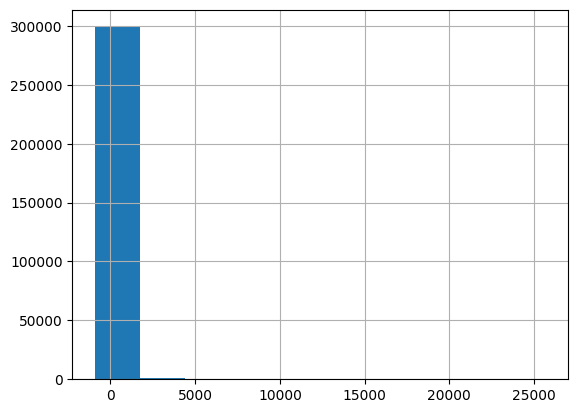

In [265]:
# Revising amount distribution

data['Amount'].describe()
data['Amount'].hist()



<Axes: >

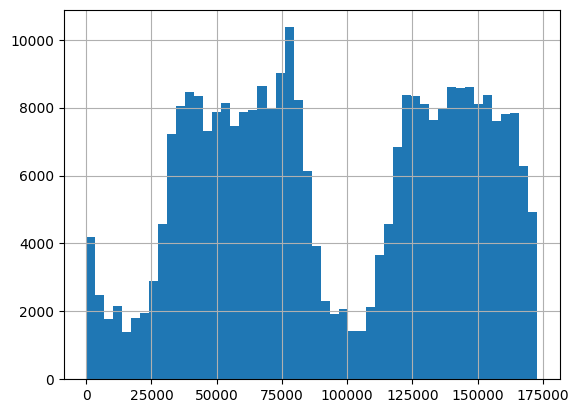

In [266]:
# Revising time column

data['cd "Time"'].describe()
data['cd "Time"'].hist(bins=50)


In [267]:
# Revizing correlations
data.corr()['Class'].sort_values()


V14         -0.762306
V12         -0.701873
V17         -0.646736
V10         -0.638076
V16         -0.605756
V3          -0.585350
V7          -0.523896
V18         -0.433878
V9          -0.426529
V1          -0.400575
V5          -0.365784
V6          -0.219802
cd "Time"   -0.040906
V24         -0.037972
V13         -0.022935
V15         -0.020961
V23         -0.011789
V22          0.001581
V25          0.017959
V26          0.023180
Amount       0.031348
V28          0.050893
V8           0.065298
V27          0.076241
V20          0.100752
V21          0.142050
V19          0.172379
V2           0.395388
V4           0.552044
V11          0.589473
Class        1.000000
Name: Class, dtype: float64

<Axes: >

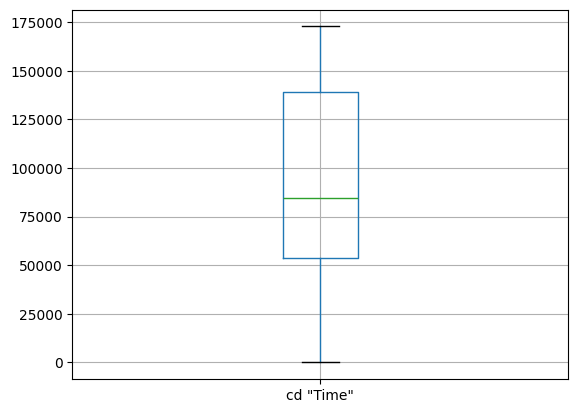

In [268]:
# Revizing outliers

data.boxplot(column='cd "Time"')

<Axes: >

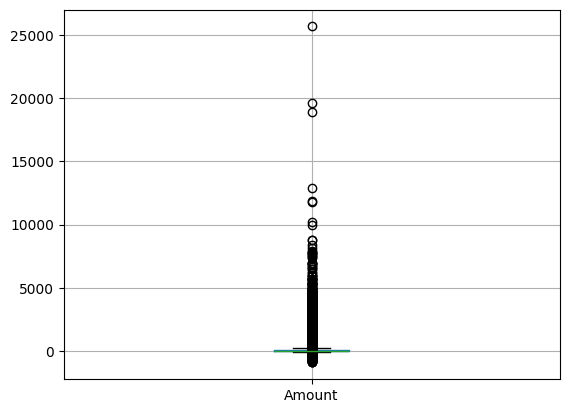

In [269]:
data.boxplot(column='Amount')

In [270]:
data

,"cd ""Time""",V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299802,172107.0,11.985406,-4.491528,11.309425,1.447103,10.036259,2.325991,11.785820,-8.135735,0.905686,...,-1.879864,0.907800,-0.136517,-0.465558,-0.431895,-0.047143,-0.607700,0.051906,416.108561,1
299803,172113.0,-10.361126,4.481350,-10.253822,5.540521,-8.960738,-2.361618,-8.641865,9.706040,-3.205500,...,4.464613,-1.388542,0.239338,0.496081,0.320713,0.506454,3.496585,0.340434,160.968229,1
299804,172128.0,-4.524699,4.784390,-8.683199,5.791957,-4.025868,-2.173776,-11.908591,-0.195581,-3.418251,...,1.834168,0.309341,-1.415421,-0.207559,-1.135637,-0.135835,1.533603,0.015526,22.229595,1
299805,172134.0,0.518489,1.090801,-3.435934,2.178735,3.300198,-3.593271,-2.308594,-0.591706,-1.660695,...,-1.649889,0.920136,-1.271195,-0.633450,0.335430,-0.005998,1.646959,0.217343,-6.175074,1


In [271]:
def clean_data(df):
    # Ensure 'Time' and 'Amount' are numeric
    df["Time"] = pd.to_numeric(df['cd "Time"'], errors="coerce")
    df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")

    # Drop rows with invalid values (very few if any)
    df = df.dropna()

    return df


data = clean_data(data)
data

,"cd ""Time""",V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0,1.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0,1.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299802,172107.0,11.985406,-4.491528,11.309425,1.447103,10.036259,2.325991,11.785820,-8.135735,0.905686,...,0.907800,-0.136517,-0.465558,-0.431895,-0.047143,-0.607700,0.051906,416.108561,1,172107.0
299803,172113.0,-10.361126,4.481350,-10.253822,5.540521,-8.960738,-2.361618,-8.641865,9.706040,-3.205500,...,-1.388542,0.239338,0.496081,0.320713,0.506454,3.496585,0.340434,160.968229,1,172113.0
299804,172128.0,-4.524699,4.784390,-8.683199,5.791957,-4.025868,-2.173776,-11.908591,-0.195581,-3.418251,...,0.309341,-1.415421,-0.207559,-1.135637,-0.135835,1.533603,0.015526,22.229595,1,172128.0
299805,172134.0,0.518489,1.090801,-3.435934,2.178735,3.300198,-3.593271,-2.308594,-0.591706,-1.660695,...,0.920136,-1.271195,-0.633450,0.335430,-0.005998,1.646959,0.217343,-6.175074,1,172134.0


In [272]:
import numpy as np
def feature_engineering(df):
    # 1. hour_of_day
    df["hour_of_day"] = (df['cd "Time"'] // 3600).astype(int)

    # 2. is_night (0 = no, 1 = yes)
    df["is_night"] = df["hour_of_day"].apply(lambda h: 1 if h in [0,1,2,3,4,5] else 0)

    # 3. amount_zscore
    df["amount_zscore"] = (df["Amount"] - df["Amount"].mean()) / df["Amount"].std()

    # 4. log_amount
    df["log_amount"] = np.log1p(df["Amount"])

    # 5. amount_percentile
    df["amount_percentile"] = df["Amount"].rank(pct=True)

    # 6. pca_sum: suma de V1...V28
    pca_cols = [col for col in df.columns if col.startswith("V")]
    df["pca_sum"] = df[pca_cols].sum(axis=1)

    # 7. pca_abs_sum
    df["pca_abs_sum"] = df[pca_cols].abs().sum(axis=1)

    # 8. amount_above_95th
    threshold_95 = df["Amount"].quantile(0.95)
    df["amount_above_95th"] = (df["Amount"] > threshold_95).astype(int)

    # 9–10. time cyclic encoding
    df["time_cycle_sin"] = np.sin(2 * np.pi * df["hour_of_day"] / 24)
    df["time_cycle_cos"] = np.cos(2 * np.pi * df["hour_of_day"] / 24)

    return df

data = feature_engineering(data)
data

c:\Users\Alffo\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,"cd ""Time""",V1,V2,V3,V4,V5,V6,V7,V8,V9,...,hour_of_day,is_night,amount_zscore,log_amount,amount_percentile,pca_sum,pca_abs_sum,amount_above_95th,time_cycle_sin,time_cycle_cos
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0,1,0.237448,5.014760,0.843608,3.081757,13.186192,0,0.000000,1.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0,1,-0.348953,1.305626,0.192049,4.439726,9.347015,0,0.000000,1.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0,1,1.151551,5.939276,0.946399,1.091311,23.944789,0,0.000000,1.000000
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0,1,0.133202,4.824306,0.815780,-2.409596,16.577259,0,0.000000,1.000000
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0,1,-0.080357,4.262539,0.715649,5.378728,15.094823,0,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299802,172107.0,11.985406,-4.491528,11.309425,1.447103,10.036259,2.325991,11.785820,-8.135735,0.905686,...,47,0,1.301009,6.033347,0.953573,42.993417,94.402943,1,-0.258819,0.965926
299803,172113.0,-10.361126,4.481350,-10.253822,5.540521,-8.960738,-2.361618,-8.641865,9.706040,-3.205500,...,47,0,0.282739,5.087400,0.856835,-61.323140,133.855374,0,-0.258819,0.965926
299804,172128.0,-4.524699,4.784390,-8.683199,5.791957,-4.025868,-2.173776,-11.908591,-0.195581,-3.418251,...,47,0,-0.270970,3.145427,0.494298,-75.923938,127.554286,0,-0.258819,0.965926
299805,172134.0,0.518489,1.090801,-3.435934,2.178735,3.300198,-3.593271,-2.308594,-0.591706,-1.660695,...,47,0,-0.384334,NaN,0.015420,-10.290587,44.676514,0,-0.258819,0.965926


In [ ]:
#Revising missing values
data.isnull().sum()



# Now we can summarize the dataset as follows:
# There are 299,807 transactions, out of which 15,492 are fraudulent.
# No null values present in the dataset.
# All features V1-28 are numerical.
# The Time and Amount columns are not normalized.
# The Class column indicates fraud (0 = normal, 1 = fraud).
# The dataset is unbalanced, with only 5.16% of transactions being fraudulent.

cd "Time"               0
V1                      0
V2                      0
V3                      0
V4                      0
V5                      0
V6                      0
V7                      0
V8                      0
V9                      0
V10                     0
V11                     0
V12                     0
V13                     0
V14                     0
V15                     0
V16                     0
V17                     0
V18                     0
V19                     0
V20                     0
V21                     0
V22                     0
V23                     0
V24                     0
V25                     0
V26                     0
V27                     0
V28                     0
Amount                  0
Class                   0
Time                    0
hour_of_day             0
is_night                0
amount_zscore           0
log_amount           4758
amount_percentile       0
pca_sum                 0
pca_abs_sum 